# Lead Scoring Case Study

__Problem Statement:__ An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Our Goals of the Case Study:

1. To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. To adjust to if the company's requirement changes in the future so you will need to handle these as well.

**The steps are broadly:**

1. Read and understand the data
2. Clean the data
3. EDA
4. Prepare the data for Model Building
5. Model Building
6. Model Evaluation
7. Making Predictions on the Test Set

### Importing and loeading the necessary libraries

In [336]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [337]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [338]:
#loading and understanding the dataset
X_Education = pd.read_csv("Leads.csv")
X_Education.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [339]:
#checking the shape of the dataset
X_Education.shape

(9240, 37)

In [340]:
#looking the type of information in the dataset
X_Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [341]:
#data descriptions
X_Education.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Exploratory data analysis (EDA)
#### Data cleaning & treatment:


In [342]:
#checking the null value present in the dataset
X_Education.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we can see there are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9240 datapoints in our dataframe, therefore droping the columns having greater than 3000 missing values as they are of no use to us.

In [343]:
# Droping all the columns which have greater than 3000 missing values.

for col in X_Education.columns:
    if X_Education[col].isnull().sum() > 3000:
        X_Education.drop(col, 1, inplace=True)

In [344]:
# Check the number of null values again
X_Education.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

__As I coudl interpret that the variable City won't be of any use in our analysis. So it's best that we drop it.__

In [345]:
#droping the city
X_Education.drop(['City'], axis = 1, inplace = True)

In [346]:
#checking the shape of the dataset after droping columns which were null vealue >3000
X_Education.shape

(9240, 30)

In [347]:
# checking the percentage of missing values in each column
round(100*(X_Education.isnull().sum()/len(X_Education.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As I can see there are a few columns in which there is a level called 'Select' which basically means that the customer has not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [348]:
#Converting 'Select' values to NaN.

X_Education= X_Education.replace('Select', np.nan)

In [349]:
# checking the percentage of missing values after replacing "Select" into NaN

round(100*(X_Education.isnull().sum()/len(X_Education.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [350]:
#dropping Lead Number and Prospect ID since they have all unique values
X_Education.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [351]:
#checking the uniques value
X_Education.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [352]:
# Dropping unique valued columns
X_Education = X_Education.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [353]:
#chaching shape again after droping many columns those are irrelavent
X_Education.shape

(9240, 23)

### Categorical Attributes Analysis

In [354]:
X_Education['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [355]:
# let's categories the country in two as we can see 95% is India

def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "Other contry"
    return category

X_Education['Country'] = X_Education.apply(lambda x:slots(x['Country']), axis = 1)

In [356]:
X_Education['Country'].value_counts()

India           6492
Other contry    2748
Name: Country, dtype: int64

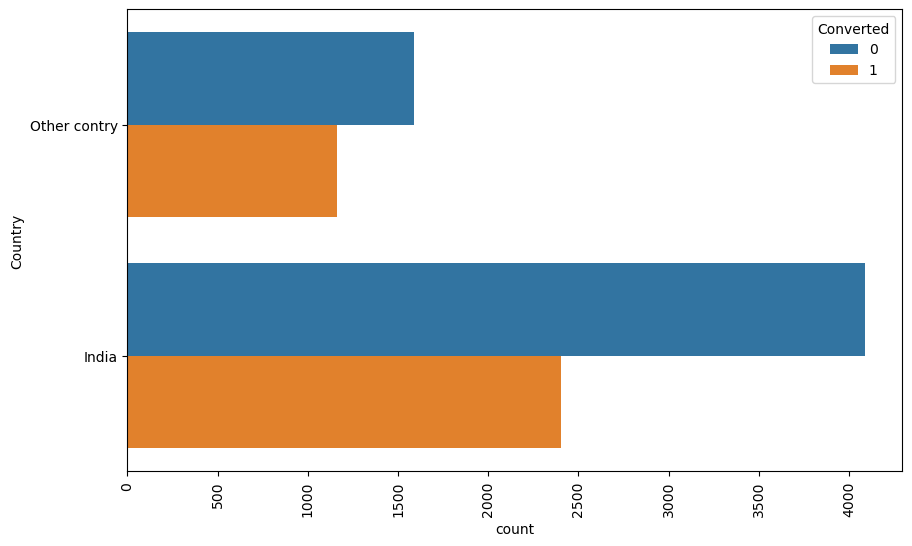

In [357]:
#plotting Country columnn 

plt.figure(figsize=(10, 6))
sns.countplot(y='Country', hue='Converted', data=X_Education)
plt.xticks(rotation=90)
plt.show()

In [358]:
# Check the number of null values again
X_Education.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

There's the column "What is your current occupation" which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [359]:
X_Education = X_Education[~pd.isnull(X_Education['What is your current occupation'])]

In [360]:
# Check the number of null values again

X_Education.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       130
Total Time Spent on Website                         0
Page Views Per Visit                              130
Last Activity                                     103
Country                                             0
Specialization                                   1947
How did you hear about X Education               5062
What is your current occupation                     0
What matters most to you in choosing a course      19
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [361]:
round(100*(X_Education.isnull().sum()/len(X_Education.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.55
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.98
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.98
Last Activity                                     1.57
Country                                           0.00
Specialization                                   29.73
How did you hear about X Education               77.28
What is your current occupation                   0.00
What matters most to you in choosing a course     0.29
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [362]:
#droping the Lead Profile as this has 63% null value
X_Education = X_Education.drop("Through Recommendations", axis=1)

In [363]:
#droping the columns "How did you hear about X Education" and "Lead Profile as they have more than 60% null values

X_Education = X_Education.drop(["How did you hear about X Education", "Lead Profile"], axis=1)

In [364]:
#checking the null value again after droping
round(100*(X_Education.isnull().sum()/len(X_Education.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.55
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.98
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.98
Last Activity                                     1.57
Country                                           0.00
Specialization                                   29.73
What is your current occupation                   0.00
What matters most to you in choosing a course     0.29
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
A free cop

In [365]:
#droping the Specialization as this has arpound 30% null value
X_Education = X_Education.drop("Specialization", axis=1)

In [366]:
#checking the null value again after droping
X_Education.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      130
Total Time Spent on Website                        0
Page Views Per Visit                             130
Last Activity                                    103
Country                                            0
What is your current occupation                    0
What matters most to you in choosing a course     19
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
A free copy of Mastering The Interview             0
Last Notable Activity                         

In [367]:
X_Education["Page Views Per Visit"].mean()

2.4669781931464176

In [368]:
#imputting the "Page Views Per Visit" with mean value
X_Education['Page Views Per Visit'] = X_Education['Page Views Per Visit'].fillna(2.4669781931464176)

In [369]:
X_Education["TotalVisits"].mean()

3.6040498442367603

In [370]:
#imputting the "Total Visits" with mean value
X_Education['TotalVisits'] = X_Education['TotalVisits'].fillna(3.6040498442367603)

In [371]:
X_Education['Last Activity'].astype('category').value_counts()

Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced                    197
Email Link Clicked               178
Form Submitted on Website         82
Unreachable                       74
Unsubscribed                      43
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [372]:
#cheking the mode value "Last Activity"
X_Education['Last Activity'].astype('category').mode()[0]

'Email Opened'

In [373]:
#imputting the "Last Activity" with mode 'Email Opened'
X_Education['Last Activity'] = X_Education['Last Activity'].fillna('Email Opened')

In [374]:
X_Education['Lead Source'].astype('category').value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         75
Facebook               46
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [375]:
#cheking the mode value "Lead Source"
X_Education['Lead Source'].astype('category').mode()[0]

'Google'

In [376]:
#imputting the "Lead Source" with mode 'Google'
X_Education['Lead Source'] = X_Education['Lead Source'].fillna('Google')

In [377]:
#cheking the mode value "What matters most to you in choosing a course"
X_Education['What matters most to you in choosing a course'].astype('category').mode()[0]

'Better Career Prospects'

In [378]:
#imputting the "What matters most to you in choosing a course" with mode 'Better Career Prospects'
X_Education['What matters most to you in choosing a course'] = X_Education['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [379]:
#checking the null value again after imputing and droping
X_Education.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

Now the data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [380]:
print(len(X_Education.index))
print(len(X_Education.index)/9240)

6550
0.7088744588744589


We still have around 70% of the rows which seems good enough go ahead

## Preparing the data for modelling

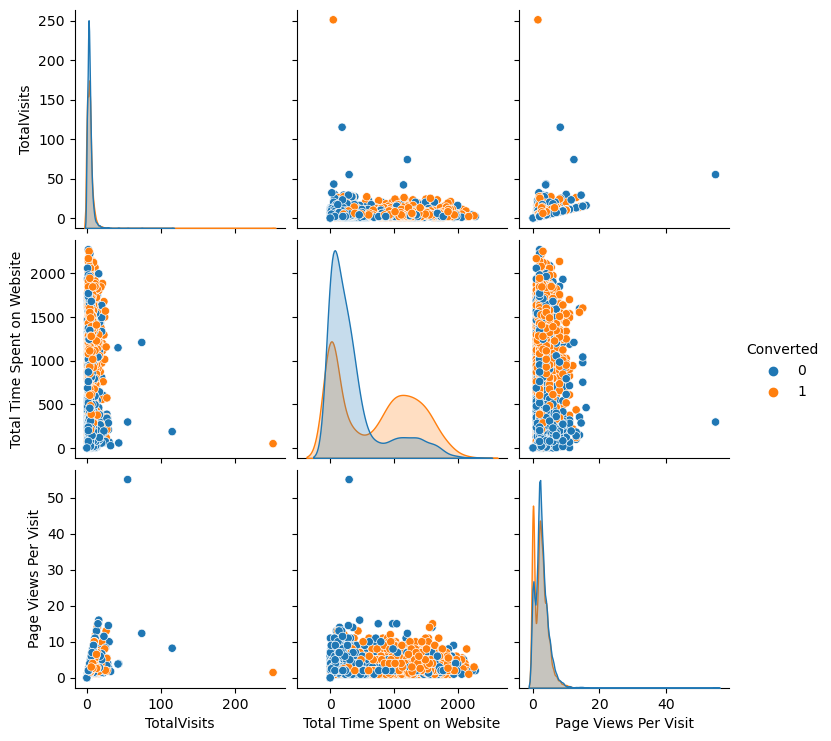

In [381]:
sns.pairplot(X_Education,diag_kind='kde',hue='Converted')
plt.show()

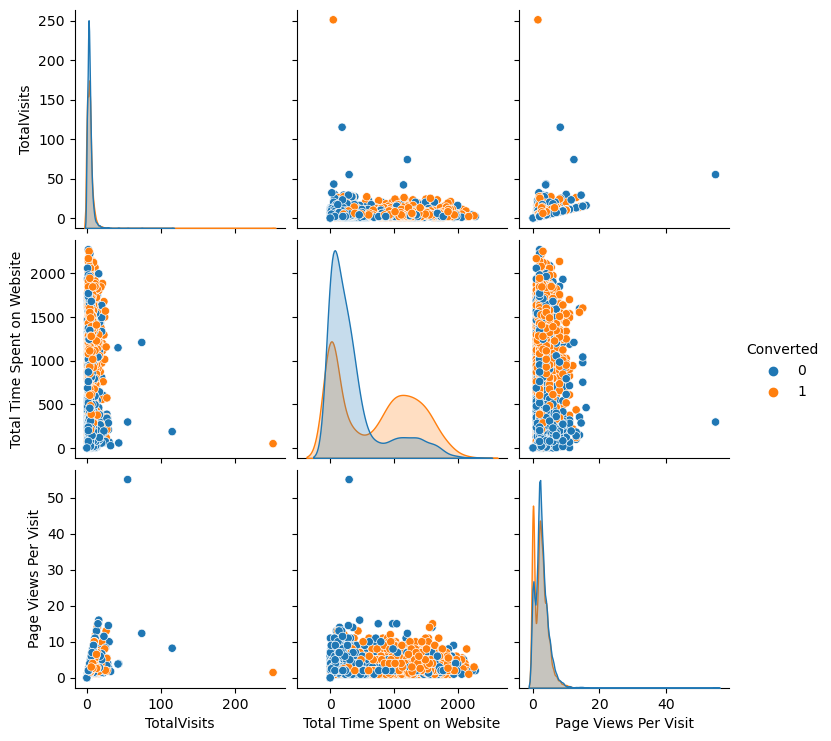

In [382]:
x_edu = X_Education[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [383]:
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.546518,-1.536096,-1.541345,-0.974672
1,0.695198,0.632783,0.234368,-0.974672
2,-0.222821,1.256072,-0.017535,1.025986
3,-0.729387,0.143436,-0.632619,-0.974672
4,-0.222821,1.197435,-0.632619,1.025986


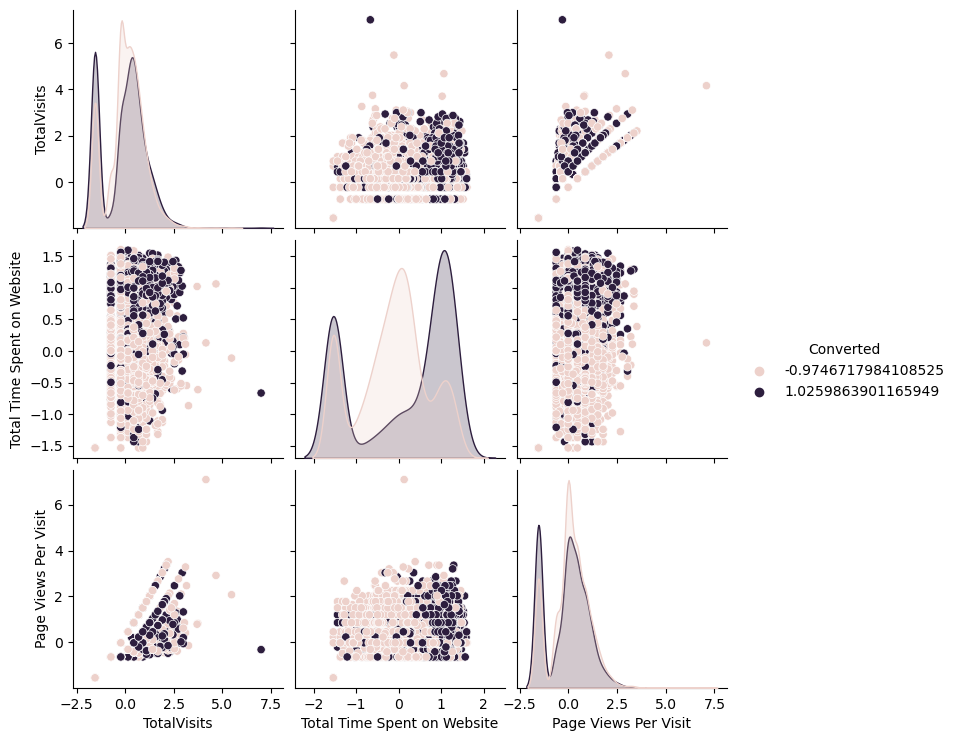

In [384]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

## Creating the dummy variable
The next step is to deal with the categorical variables present in the dataset. So first take a look at what are those  variables are actually categorical variables.

In [385]:
# Checking the columns which are of type 'object'

temp = X_Education.loc[:, X_Education.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [386]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(X_Education[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
X_Education = pd.concat([X_Education, dummy], axis=1)

In [387]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

#dummy_spl = pd.get_dummies(X_Education['Specialization'], prefix = 'Specialization')
#dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
#X_Education = pd.concat([X_Education, dummy_spl], axis = 1)

In [388]:
#Drop the variables for which the dummy variables have been created

X_Education = X_Education.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'A free copy of Mastering The Interview','Last Notable Activity'], 1)

In [389]:
# Let's take a look at the dataset again
X_Education.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Train-Test Split

The next step is to split the dataset into training an testing sets.

In [390]:
# Put all the feature variables in X

X = X_Education.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [391]:
# Put the target variable in y
y = X_Education['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [392]:
#Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [393]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8766,0.095652,0.261444,0.066727,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
148,0.043478,0.102113,0.045455,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8146,0.121739,0.801937,0.127273,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2782,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6309,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Looking at the correlations

Let's  look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

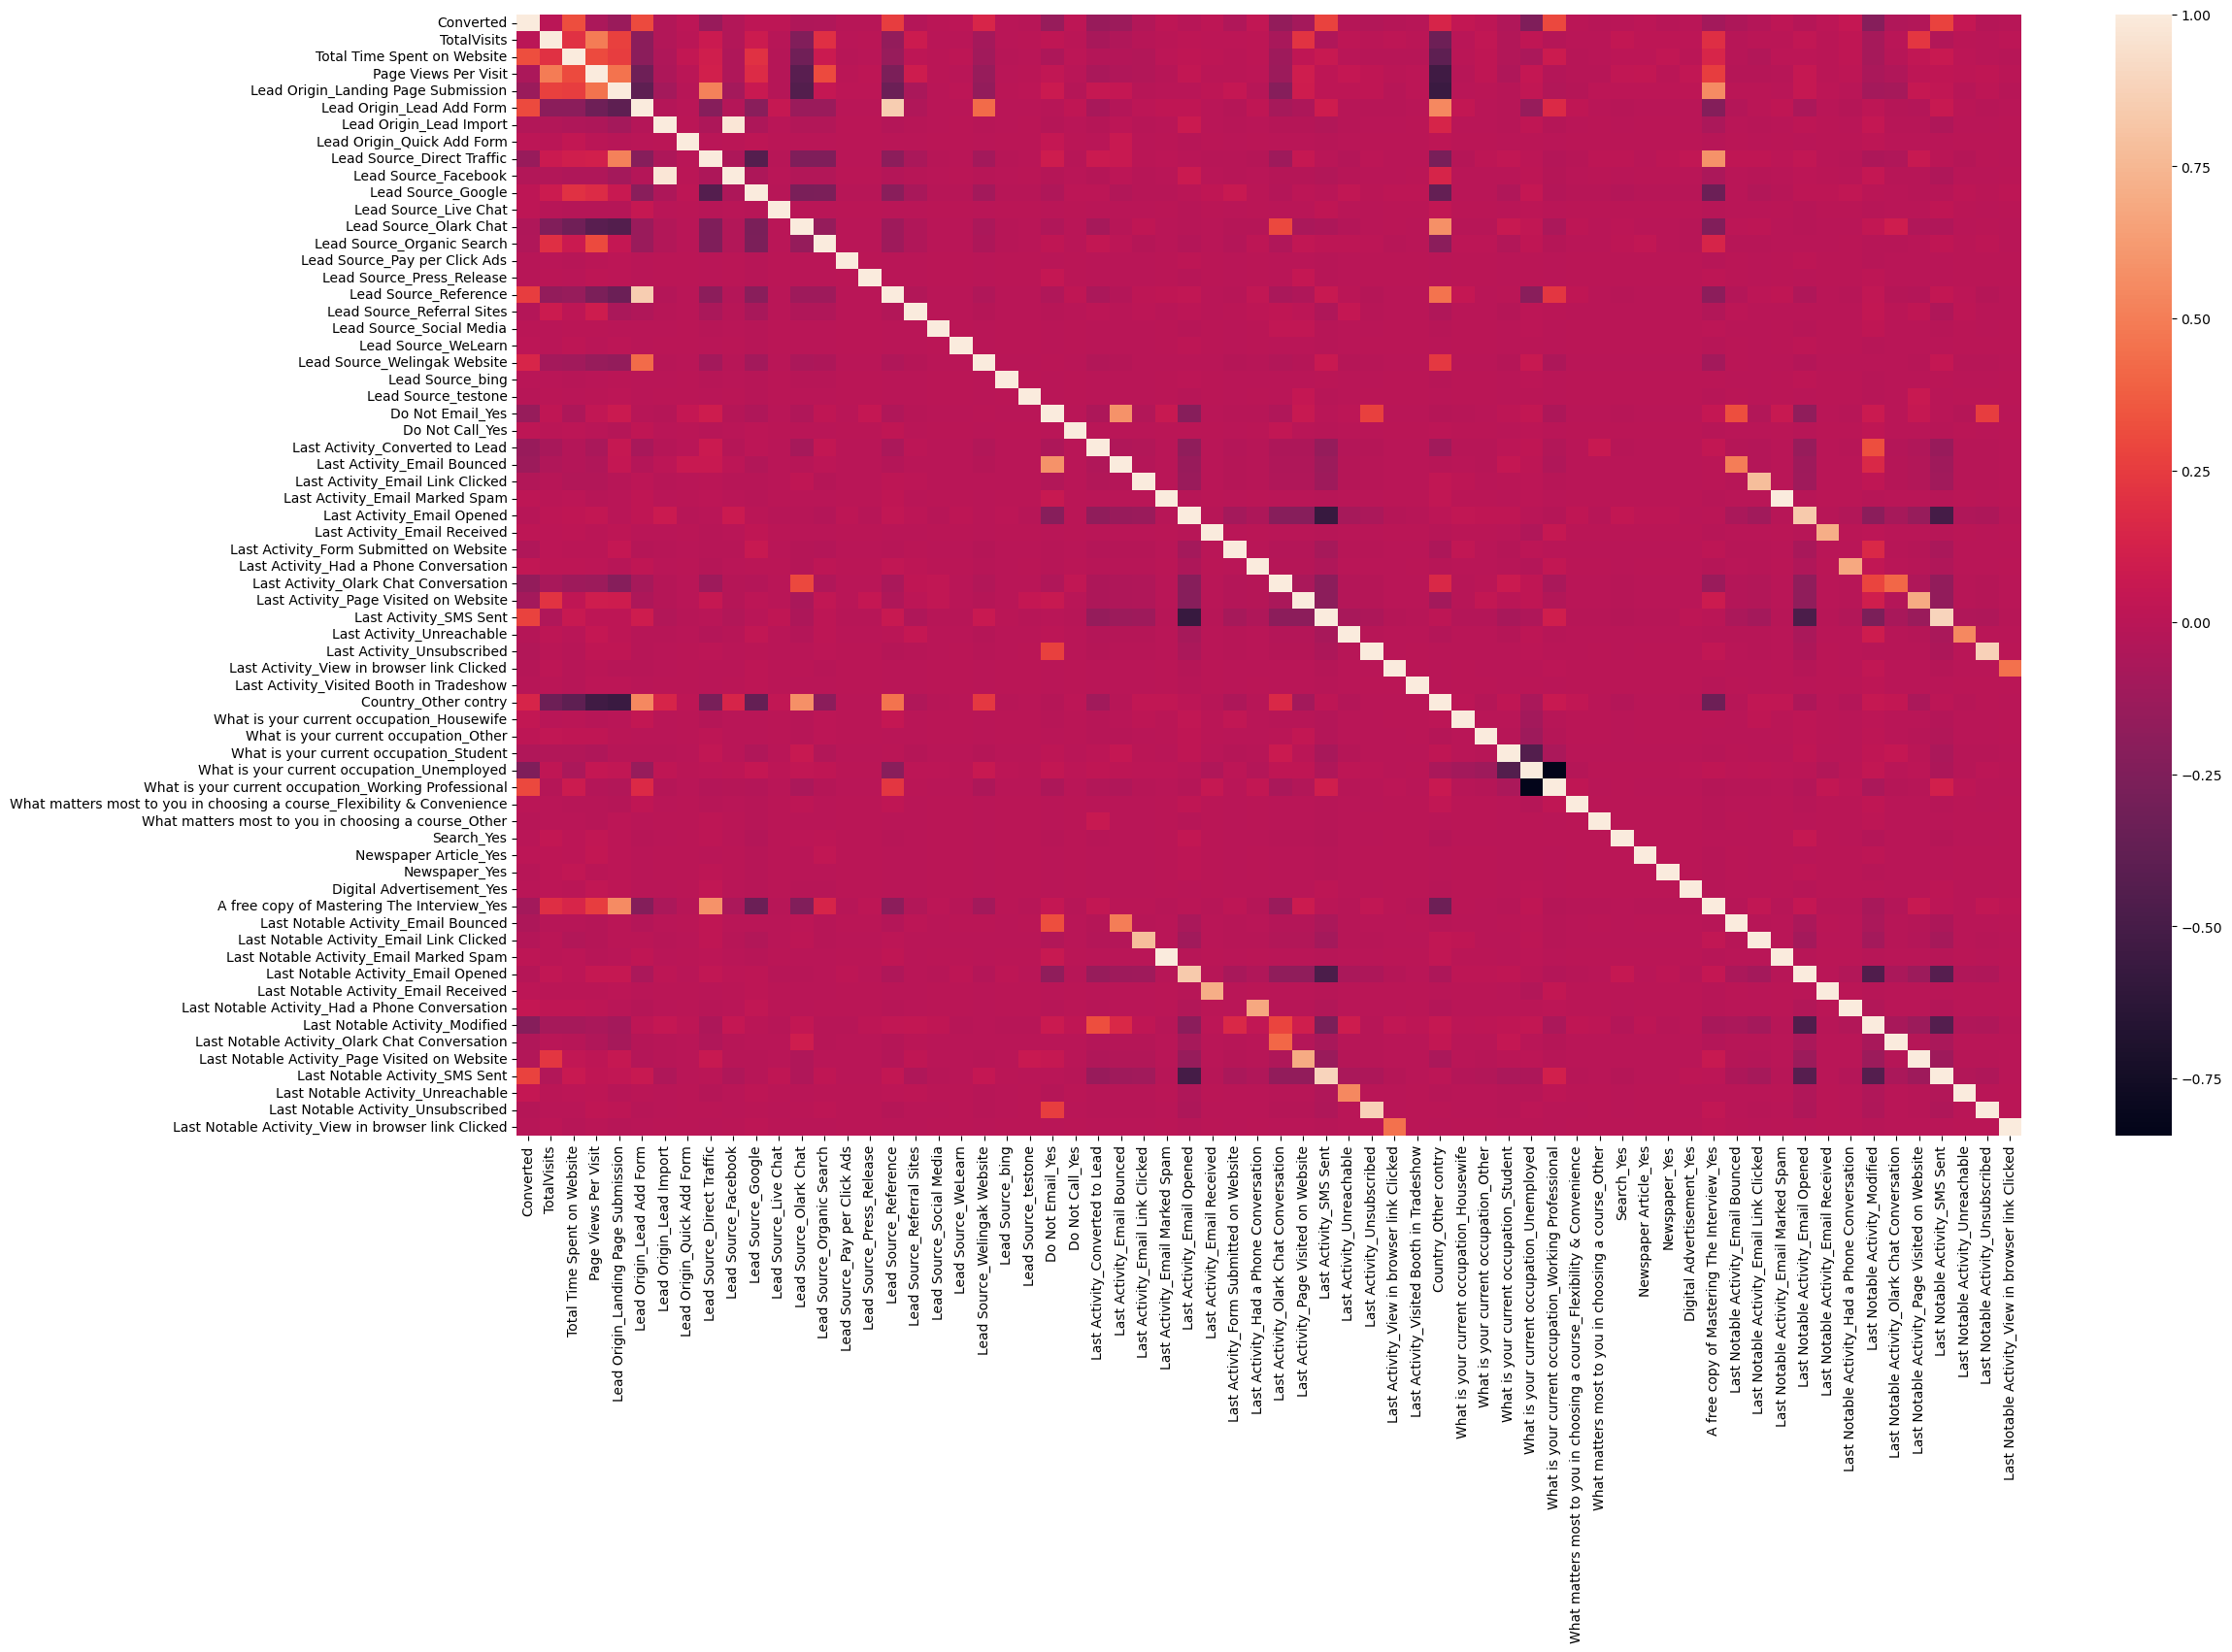

In [394]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X_Education.corr())
plt.show()

## Model Building

Let's now move to model building. As we can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [395]:
# Creating a LogisticRegression object
logreg = LogisticRegression()

In [396]:
# running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)                
rfe = rfe.fit(X_train, y_train)

In [397]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_testone', False, 47),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 12),
 ('Last Activity_Converted to Lead', False, 4)

In [398]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [399]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

In [400]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.3
Date:                Thu, 22 Jun 2023   Deviance:                       4142.6
Time:                        14:48:15   Pearson chi2:                 4.74e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1332      0.603     -1.878      0.060      -2.316       0.049
TotalVisits                                              5.3821      1.411      3.815      0.000       2.617       8.147
Total Time Spent on Website                              4.4433      0.185     24.016      0.000       4.081       4.806
Page Views Per Visit                                    -4.3063      1.477     -2.916      0.004      -7.201      -1.412
Lead Origin_Lead Add Form                                3.5093      0.209     16.830      0.000       3.101       3.918
Lead Source_Olark Chat                                   1.2765      0.136      9.406      0.000       1.010       1.542
Lead Source_Welingak Website                             2.4775      1.027      2.412      0.016       0.465       4.490
Do Not Email_Yes                                        -1.3636      0.178     -7.674      0.000      -1.712      -1.015
Last Activity_SMS Sent                                   1.1318      0.085     13.382      0.000       0.966       1.298
What is your current occupation_Housewife               23.1778   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
What is your current occupation_Student                 -0.8236      0.629     -1.309      0.191      -2.057       0.410
What is your current occupation_Unemployed              -0.7177      0.592     -1.212      0.226      -1.878       0.443
What is your current occupation_Working Professional     1.8574      0.618      3.003      0.003       0.645       3.070
Last Notable Activity_Had a Phone Conversation          23.2484   2.28e+04      0.001      0.999   -4.46e+04    4.47e+04
Last Notable Activity_Modified                          -0.9465      0.090    -10.557      0.000      -1.122      -0.771
Last Notable Activity_Unreachable                        2.5655      0.802      3.197      0.001       0.993       4.138
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [401]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.16
2,Page Views Per Visit,4.48
0,TotalVisits,2.94
1,Total Time Spent on Website,2.35
11,What is your current occupation_Working Profes...,1.84
3,Lead Origin_Lead Add Form,1.72
7,Last Activity_SMS Sent,1.70
4,Lead Source_Olark Chat,1.68
13,Last Notable Activity_Modified,1.64
5,Lead Source_Welingak Website,1.24


VIFs seem to be in a decent range except for one variables.
Let's first drop the variable What is your current occupation_Unemployed e since it has a high high VIF.

In [402]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [403]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Thu, 22 Jun 2023   Deviance:                       4144.0
Time:                        14:48:15   Pearson chi2:                 4.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8522      0.113    -16.443      0.000      -2.073      -1.631
TotalVisits                                              5.4601      1.420      3.845      0.000       2.677       8.243
Total Time Spent on Website                              4.4456      0.185     24.030      0.000       4.083       4.808
Page Views Per Visit                                    -4.2721      1.476     -2.895      0.004      -7.164      -1.380
Lead Origin_Lead Add Form                                3.5142      0.208     16.859      0.000       3.106       3.923
Lead Source_Olark Chat                                   1.2793      0.136      9.430      0.000       1.013       1.545
Lead Source_Welingak Website                             2.4742      1.027      2.409      0.016       0.461       4.487
Do Not Email_Yes                                        -1.3622      0.178     -7.667      0.000      -1.710      -1.014
Last Activity_SMS Sent                                   1.1275      0.084     13.346      0.000       0.962       1.293
What is your current occupation_Housewife               23.8911   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
What is your current occupation_Student                 -0.1095      0.221     -0.496      0.620      -0.542       0.323
What is your current occupation_Working Professional     2.5715      0.189     13.616      0.000       2.201       2.942
Last Notable Activity_Had a Phone Conversation          23.2418   2.28e+04      0.001      0.999   -4.47e+04    4.47e+04
Last Notable Activity_Modified                          -0.9443      0.090    -10.537      0.000      -1.120      -0.769
Last Notable Activity_Unreachable                        2.5686      0.801      3.206      0.001       0.998       4.139
========================================================================================================================
"""

In [404]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.64
0,TotalVisits,2.87
1,Total Time Spent on Website,1.99
7,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
12,Last Notable Activity_Modified,1.40
5,Lead Source_Welingak Website,1.24
10,What is your current occupation_Working Profes...,1.21
4,Lead Source_Olark Chat,1.16
6,Do Not Email_Yes,1.08


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with What is your current occupation_Housewife.

In [405]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [406]:
#Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Thu, 22 Jun 2023   Deviance:                       4156.7
Time:                        14:48:16   Pearson chi2:                 4.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8413      0.112    -16.388      0.000      -2.061      -1.621
TotalVisits                                              5.4075      1.414      3.825      0.000       2.637       8.178
Total Time Spent on Website                              4.4383      0.185     24.031      0.000       4.076       4.800
Page Views Per Visit                                    -4.2639      1.473     -2.894      0.004      -7.152      -1.376
Lead Origin_Lead Add Form                                3.5293      0.208     16.980      0.000       3.122       3.937
Lead Source_Olark Chat                                   1.2698      0.135      9.376      0.000       1.004       1.535
Lead Source_Welingak Website                             2.4496      1.027      2.386      0.017       0.437       4.462
Do Not Email_Yes                                        -1.3670      0.178     -7.696      0.000      -1.715      -1.019
Last Activity_SMS Sent                                   1.1201      0.084     13.272      0.000       0.955       1.286
What is your current occupation_Student                 -0.1161      0.221     -0.526      0.599      -0.549       0.316
What is your current occupation_Working Professional     2.5633      0.189     13.581      0.000       2.193       2.933
Last Notable Activity_Had a Phone Conversation          22.2366   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
Last Notable Activity_Modified                          -0.9381      0.089    -10.496      0.000      -1.113      -0.763
Last Notable Activity_Unreachable                        2.5608      0.801      3.196      0.001       0.991       4.131
========================================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [407]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.64
0,TotalVisits,2.87
1,Total Time Spent on Website,1.99
7,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
11,Last Notable Activity_Modified,1.40
5,Lead Source_Welingak Website,1.24
9,What is your current occupation_Working Profes...,1.21
4,Lead Source_Olark Chat,1.16
6,Do Not Email_Yes,1.08


### Creating Prediction

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [408]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8766    0.386563
148     0.204412
8146    0.950323
2782    0.635828
6309    0.994871
2652    0.871309
5863    0.165881
8956    0.461481
482     0.670825
2220    0.241288
dtype: float64

In [409]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38656283, 0.20441186, 0.95032252, 0.6358283 , 0.99487073,
       0.87130943, 0.16588059, 0.46148133, 0.6708248 , 0.24128782])

In [410]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.386563
1,0,0.204412
2,1,0.950323
3,1,0.635828
4,1,0.994871


In [411]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.386563,0
1,0,0.204412,0
2,1,0.950323,1
3,1,0.635828,1
4,1,0.994871,1


## Model Evaluation

In [412]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1984,  394],
       [ 566, 1641]], dtype=int64)

In [413]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7906215921483097

That's around 80% accuracy with is a very good value

In [414]:
# Let's evaluate the other metrics as well

TP = confusion[1][1]  # true positive 
TN = confusion[0][0]  # true negatives
FP = confusion[0][1]  # false positives
FN = confusion[1][0]  # false negatives

In [415]:
# Calculating the sensitivity
TP / (TP + FN)

0.7435432714091527

In [416]:
# Calculating the specificity
TN/(TN+FP)

0.8343145500420521

With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 74% and specificity of around 83%.

### Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one

In [417]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [418]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

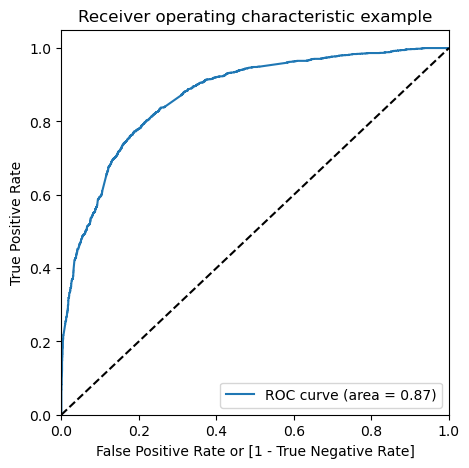

In [419]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [420]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.386563,0,1,1,1,1,0,0,0,0,0,0
1,0,0.204412,0,1,1,1,0,0,0,0,0,0,0
2,1,0.950323,1,1,1,1,1,1,1,1,1,1,1
3,1,0.635828,1,1,1,1,1,1,1,1,0,0,0
4,1,0.994871,1,1,1,1,1,1,1,1,1,1,1


In [421]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481352  1.000000  0.000000
0.1   0.1  0.585387  0.985501  0.214045
0.2   0.2  0.726936  0.942456  0.526913
0.3   0.3  0.765322  0.906661  0.634146
0.4   0.4  0.788659  0.814227  0.764929
0.5   0.5  0.790622  0.743543  0.834315
0.6   0.6  0.780589  0.677843  0.875946
0.7   0.7  0.740894  0.549615  0.918419
0.8   0.8  0.717993  0.464431  0.953322
0.9   0.9  0.656052  0.304486  0.982338


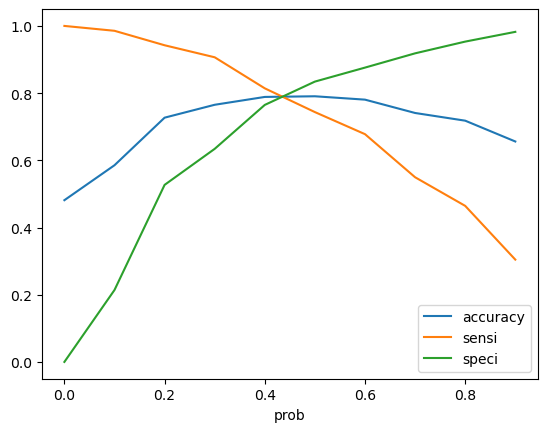

In [422]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [423]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.386563,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.204412,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.950323,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.635828,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.994871,1,1,1,1,1,1,1,1,1,1,1,1


In [424]:
#Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908396946564885

In [425]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1868,  510],
       [ 449, 1758]], dtype=int64)

In [426]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [427]:
# Calculate Sensitivity

TP/(TP+FN)

0.7965564114182148

In [428]:
# Calculate Specificity

TN/(TN+FP)

0.7855340622371741

This cutoff point seems good to go!

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [429]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [430]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
5966,0.026087,0.112236,0.054545,0,0,0,0,1,0,0,1,0,0,0,0
152,0.017391,0.102993,0.018182,0,0,0,1,0,0,0,1,0,0,1,0
5132,0.052174,0.078345,0.027273,0,0,0,0,0,0,0,1,0,0,0,0
5308,0.104348,0.062500,0.072727,0,0,0,0,0,0,0,1,0,0,0,0
5021,0.017391,0.554577,0.036364,0,0,0,0,1,0,0,1,0,0,0,0


In [431]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [432]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
5966,1.0,0.026087,0.112236,0.054545,0,0,0,0,1,0,0,1,0,0,0,0
152,1.0,0.017391,0.102993,0.018182,0,0,0,1,0,0,0,1,0,0,1,0
5132,1.0,0.052174,0.078345,0.027273,0,0,0,0,0,0,0,1,0,0,0,0
5308,1.0,0.104348,0.062500,0.072727,0,0,0,0,0,0,0,1,0,0,0,0
5021,1.0,0.017391,0.554577,0.036364,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,1,0
4610,1.0,0.017391,0.740757,0.036364,0,0,0,0,1,0,0,0,1,0,0,0
5496,1.0,0.017391,0.063820,0.036364,0,0,0,0,0,0,0,1,0,0,0,0
8257,1.0,0.026087,0.055898,0.054545,0,0,0,0,1,0,0,0,1,0,0,0


In [433]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [434]:
y_test_pred[:10]

5966    0.421906
152     0.024409
5132    0.207600
5308    0.210022
5021    0.843172
8191    0.840022
8389    0.182972
417     0.134910
6879    0.988096
3513    0.571241
dtype: float64

In [435]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [436]:
# Let's see the head
y_pred_1.head()

,0
5966,0.421906
152,0.024409
5132,0.207600
5308,0.210022
5021,0.843172


In [437]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [438]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [439]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [440]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,0,0.421906
1,0,0.024409
2,0,0.207600
3,0,0.210022
4,1,0.843172


In [441]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [442]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.421906
1,0,0.024409
2,0,0.207600
3,0,0.210022
4,1,0.843172


In [443]:
# Make predictions on the test set using 0.45 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [444]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.421906,1
1,0,0.024409,0
2,0,0.207600,0
3,0,0.210022,0
4,1,0.843172,1


In [445]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7893129770992366

In [446]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[778, 203],
       [211, 773]], dtype=int64)

In [447]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [448]:
# Calculate sensitivity
TP / float(TP+FN)

0.7855691056910569

In [449]:
# Calculate specificity
TN / float(TN+FP)

0.7930682976554536

### Precision-Recall View

Let's now also build the training model using the precision-recall view

In [450]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1984,  394],
       [ 566, 1641]], dtype=int64)

### Precision

In [451]:
TP / TP + FP

204.0

In [452]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8063882063882064

### Recall

In [453]:
TP / TP + FN

212.0

In [454]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7435432714091527

### Precision and recall tradeoff

In [455]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4580    1
 4581    0
 4582    1
 4583    1
 4584    0
 Name: Converted, Length: 4585, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4580    1
 4581    0
 4582    1
 4583    1
 4584    0
 Name: Predicted, Length: 4585, dtype: int64)

In [456]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

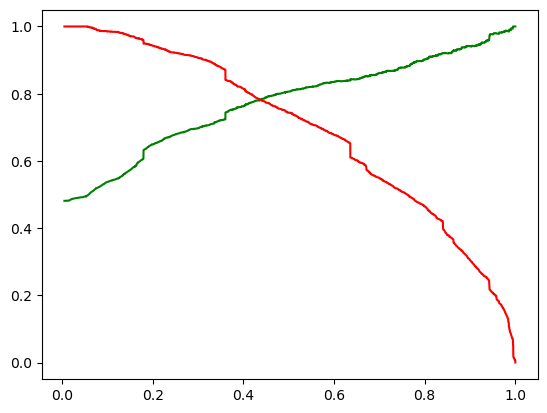

In [457]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [458]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.386563,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.204412,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.950323,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.635828,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.994871,1,1,1,1,1,1,1,1,1,1,1,1


In [459]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7906215921483097

In [460]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1904,  474],
       [ 486, 1721]], dtype=int64)

In [461]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [462]:
# Calculate Precision
TP/(TP+FP)

0.7840546697038724

In [463]:
# Calculate Recall
TP/(TP+FN)

0.7797915722700498

This cutoff point seems good to go!

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [464]:
# Making predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [465]:
y_test_pred[:10]

5966    0.421906
152     0.024409
5132    0.207600
5308    0.210022
5021    0.843172
8191    0.840022
8389    0.182972
417     0.134910
6879    0.988096
3513    0.571241
dtype: float64

In [466]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [467]:
# Let's see the head
y_pred_1.head()

,0
5966,0.421906
152,0.024409
5132,0.207600
5308,0.210022
5021,0.843172


In [468]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [469]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [470]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [471]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.421906
1,0,0.024409
2,0,0.207600
3,0,0.210022
4,1,0.843172


In [472]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [473]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.421906
1,0,0.024409
2,0,0.207600
3,0,0.210022
4,1,0.843172


In [474]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [475]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.421906,0
1,0,0.024409,0
2,0,0.207600,0
3,0,0.210022,0
4,1,0.843172,1


In [476]:
# checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7898218829516539

In [477]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[787, 194],
       [219, 765]], dtype=int64)

In [478]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [479]:
# Calculate Precision
TP/(TP+FP)

0.7977059436913452

In [480]:
# Calculate Recall
TP/(TP+FN)

0.7774390243902439

## Summary/Conclusion

1. In the initial stage (top), there are many leads generated, but only a few become paying customers at the bottom.
2. The middle stage is crucial for nurturing potential leads through education and constant communication.
3. To increase lead conversion, identify the best prospects based on factors like 'TotalVisits,' 'Total Time Spent on Website,' and 'Page Views Per Visit.'
4. Maintain a handy list of leads and keep them informed about new courses, services, job offers, and future higher studies.
5. Monitor each lead closely and personalize the information sent to them based on their interests.
6. Tailor job offerings, information, or courses to match the individual interests of leads.
7. Develop a well-structured plan to address the specific needs of each lead.
8. Focus on converted leads and conduct question-answer sessions to gather relevant information.
9. Follow up with further inquiries and appointments to determine leads' intentions and willingness to join online courses

--End--